# OPTIMIZATION METHODS FOR DATA SCIENCE
## FINAL PROJECT - PART 1: Multi-Layer Perceptron

**Submission Date:** 30/04/2025

**Team Members:**
*   **Asia Montico**, 1966494
*   **Jacopo Caldana**, [Insert ID]

---

## 1. Introduction & Dataset Analysis

The goal of **Part 1** is to implement a neural network for regression from scratch, utilizing `scipy.optimize` and avoiding automatic differentiation frameworks.

### 1.1 Dataset: AGE REGRESSION
We utilize the **UTKFace dataset**, specifically the `AGE REGRESSION.csv` subset.
*   **Input:** Feature vectors extracted from a ResNet backbone.
*   **Target (`gt`):** A continuous float number representing Age (0-116).
*   **Goal:** Minimize the L2 Regularized Squared Loss to predict age.

Below, we load the data and visualize the distribution of ages to understand the target variable.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

# Setup
sns.set_theme(style="whitegrid")
local_filename = 'AGE_REGRESSION.csv'
github_url = 'https://raw.githubusercontent.com/JacopoCaldana/Age_Gender_Ethicity_classification/4ca71fc9ffc337f52b58f28c606a0457be2c27d2/dataset/AGE_PREDICTION.csv'

# --- HELPER FUNCTIONS FOR DATA QUALITY ---
def audit_dataframe(df, target_col):
    """Performs a health check on the dataframe."""
    n, d = df.shape
    y = df[target_col].to_numpy(dtype=float)

    nan_total = int(df.isna().sum().sum())
    inf_total = int(np.isinf(df.iloc[:, :-1].to_numpy(dtype=float)).sum())
    dup_rows = int(df.duplicated().sum())

    # Check Target Range [0, 116] based on dataset specs
    out_of_range = int(np.sum((y < 0) | (y > 116)))

    return {
        "Samples": n, "Features": d-1,
        "Total NaNs": nan_total, "Total Infs": inf_total,
        "Duplicate Rows": dup_rows, "Invalid Targets": out_of_range
    }

def clean_dataframe(df, target_col):
    """Cleans the dataframe based on audit results."""
    initial_len = len(df)
    # 1. Handle Infs -> NaNs
    df = df.replace([np.inf, -np.inf], np.nan)
    # 2. Target Validation
    df = df[df[target_col].notna()]
    df = df[(df[target_col] >= 0) & (df[target_col] <= 116)]
    # 3. Deduplication
    df = df.drop_duplicates()
    # 4. Feature Imputation (Median)
    feat_cols = [c for c in df.columns if c != target_col]
    df[feat_cols] = df[feat_cols].fillna(df[feat_cols].median())

    log = f"Rows dropped: {initial_len - len(df)}"
    return df.reset_index(drop=True), log

# --- EXECUTION ---
if os.path.exists(local_filename):
    print(f"Loading local file: {local_filename}")
    df_raw = pd.read_csv(local_filename)
else:
    print("Downloading dataset...")
    df_raw = pd.read_csv(github_url)
    df_raw.to_csv(local_filename, index=False)

target_col = df_raw.columns[-1]

# Audit -> Clean -> Audit
print("\n[1] AUDIT RAW DATA:")
print(json.dumps(audit_dataframe(df_raw, target_col), indent=4))

df, cleaning_log = clean_dataframe(df_raw, target_col)

print(f"\n[2] CLEANING LOG: {cleaning_log}")
print("\n[3] AUDIT CLEAN DATA:")
print(json.dumps(audit_dataframe(df, target_col), indent=4))

Loading local file: AGE_REGRESSION.csv

[1] AUDIT RAW DATA:
{
    "Samples": 20475,
    "Features": 32,
    "Total NaNs": 0,
    "Total Infs": 0,
    "Duplicate Rows": 169,
    "Invalid Targets": 0
}

[2] CLEANING LOG: Rows dropped: 169

[3] AUDIT CLEAN DATA:
{
    "Samples": 20306,
    "Features": 32,
    "Total NaNs": 0,
    "Total Infs": 0,
    "Duplicate Rows": 0,
    "Invalid Targets": 0
}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

# Setup
sns.set_theme(style="whitegrid")
local_filename = 'AGE_REGRESSION.csv'
github_url = 'https://raw.githubusercontent.com/JacopoCaldana/Age_Gender_Ethicity_classification/4ca71fc9ffc337f52b58f28c606a0457be2c27d2/dataset/AGE_PREDICTION.csv'

# --- HELPER FUNCTIONS FOR DATA QUALITY ---
def audit_dataframe(df, target_col):
    """Performs a health check on the dataframe."""
    n, d = df.shape
    y = df[target_col].to_numpy(dtype=float)

    nan_total = int(df.isna().sum().sum())
    inf_total = int(np.isinf(df.iloc[:, :-1].to_numpy(dtype=float)).sum())
    dup_rows = int(df.duplicated().sum())

    # Check Target Range [0, 116] based on dataset specs
    out_of_range = int(np.sum((y < 0) | (y > 116)))

    return {
        "Samples": n, "Features": d-1,
        "Total NaNs": nan_total, "Total Infs": inf_total,
        "Duplicate Rows": dup_rows, "Invalid Targets": out_of_range
    }

def clean_dataframe(df, target_col):
    """Cleans the dataframe based on audit results."""
    initial_len = len(df)
    # 1. Handle Infs -> NaNs
    df = df.replace([np.inf, -np.inf], np.nan)
    # 2. Target Validation
    df = df[df[target_col].notna()]
    df = df[(df[target_col] >= 0) & (df[target_col] <= 116)]
    # 3. Deduplication
    df = df.drop_duplicates()
    # 4. Feature Imputation (Median)
    feat_cols = [c for c in df.columns if c != target_col]
    df[feat_cols] = df[feat_cols].fillna(df[feat_cols].median())

    log = f"Rows dropped: {initial_len - len(df)}"
    return df.reset_index(drop=True), log

# --- EXECUTION ---
if os.path.exists(local_filename):
    print(f"Loading local file: {local_filename}")
    df_raw = pd.read_csv(local_filename)
else:
    print("Downloading dataset...")
    df_raw = pd.read_csv(github_url)
    df_raw.to_csv(local_filename, index=False)

target_col = df_raw.columns[-1]

# Audit -> Clean -> Audit
print("\n[1] AUDIT RAW DATA:")
print(json.dumps(audit_dataframe(df_raw, target_col), indent=4))

df, cleaning_log = clean_dataframe(df_raw, target_col)

print(f"\n[2] CLEANING LOG: {cleaning_log}")
print("\n[3] AUDIT CLEAN DATA:")
print(json.dumps(audit_dataframe(df, target_col), indent=4))

Loading local file: AGE_REGRESSION.csv

[1] AUDIT RAW DATA:
{
    "Samples": 20475,
    "Features": 32,
    "Total NaNs": 0,
    "Total Infs": 0,
    "Duplicate Rows": 169,
    "Invalid Targets": 0
}

[2] CLEANING LOG: Rows dropped: 169

[3] AUDIT CLEAN DATA:
{
    "Samples": 20306,
    "Features": 32,
    "Total NaNs": 0,
    "Total Infs": 0,
    "Duplicate Rows": 0,
    "Invalid Targets": 0
}


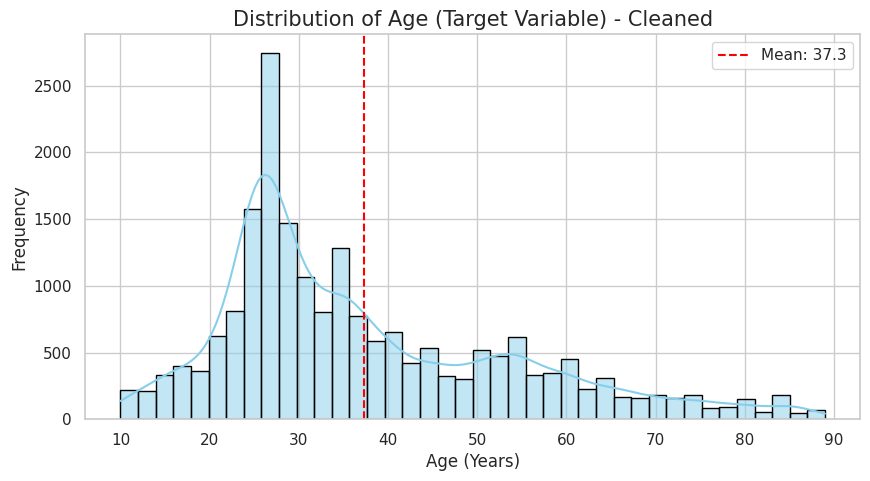

In [ ]:
# Plotting the cleaned target distribution
plt.figure(figsize=(10, 5))
sns.histplot(df.iloc[:, -1], bins=40, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Age (Target Variable) - Cleaned', fontsize=15)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df.iloc[:, -1].mean(), color='red', linestyle='--', label=f'Mean: {df.iloc[:, -1].mean():.1f}')
plt.legend()
plt.show()

## 2. Model Implementation (MLP)

We implement a **Multi-Layer Perceptron** with at least two hidden layers.
The objective is to minimize the **L2 Regularized Squared Loss Function**:

$$ E(\omega) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \lambda \sum_{l=1}^{L} ||\omega^{(l)}||^2 $$

**Key Implementation Details:**
1.  **Manual Backpropagation:** Gradients $\nabla E$ are computed via matrix calculus without `autograd`.
2.  **Optimization:** We use `scipy.optimize.minimize` with the **L-BFGS-B** solver.
3.  **Metric:** We evaluate performance using **MAPE** (Mean Absolute Percentage Error).

The class below (`MLP_Regression`) encapsulates the forward pass, loss computation, and backward pass.

In [ ]:
%%writefile Functions_ij_Montico_Caldana.py
import numpy as np

class MLP_Regression:
    def __init__(self, input_size, hidden_layers, output_size, lambda_reg, activation='tanh'):
        """
        Multi-Layer Perceptron for Regression.
        Implements manual gradient calculation for L2 Regularized Loss.
        """
        self.input_size = input_size
        # Layer sizes includes Input, Hidden Layers, and Output
        self.layer_sizes = [input_size] + hidden_layers + [output_size]
        self.lambda_reg = lambda_reg
        self.activation_name = activation

        # --- SMART INITIALIZATION ---
        self.params = []
        for i in range(len(self.layer_sizes) - 1):
            n_in = self.layer_sizes[i]
            n_out = self.layer_sizes[i+1]

            if self.activation_name == 'relu':
                # He Initialization (Optimal for ReLU)
                # Std = sqrt(2 / n_in)
                std = np.sqrt(2.0 / n_in)
                W = np.random.normal(0.0, std, (n_in, n_out))

            else:
                # Xavier/Glorot Initialization (Optimal for Tanh/Sigmoid)
                # Uniform distribution within [-limit, limit]
                limit = np.sqrt(6.0 / (n_in + n_out))
                W = np.random.uniform(-limit, limit, (n_in, n_out))

            # Biases initialized to zero
            b = np.zeros((1, n_out))

            self.params.append(W)
            self.params.append(b)

    def get_activation(self, Z):
        if self.activation_name == 'tanh':
            return np.tanh(Z)
        elif self.activation_name == 'relu':
            return np.maximum(0, Z)
        elif self.activation_name == 'sigmoid':
            return 1 / (1 + np.exp(-Z))
        return Z

    def get_activation_derivative(self, A):
        if self.activation_name == 'tanh':
            return 1 - np.power(A, 2)
        elif self.activation_name == 'relu':
            return (A > 0).astype(float)
        elif self.activation_name == 'sigmoid':
            return A * (1 - A)
        return np.ones_like(A)

    def flatten_params(self):
        return np.concatenate([p.ravel() for p in self.params])

    def unflatten_params(self, flat_params):
        params = []
        start = 0
        for i in range(len(self.layer_sizes) - 1):
            n_in = self.layer_sizes[i]
            n_out = self.layer_sizes[i+1]
            w_size = n_in * n_out
            W = flat_params[start : start + w_size].reshape((n_in, n_out))
            start += w_size
            b_size = n_out
            b = flat_params[start : start + b_size].reshape((1, n_out))
            start += b_size
            params.append(W)
            params.append(b)
        return params

    def forward(self, X, params=None):
        if params is None:
            params = self.params
        else:
            params = self.unflatten_params(params)
        activations = [X]
        current_input = X
        num_layers = len(self.layer_sizes) - 1

        for i in range(num_layers):
            W = params[2*i]
            b = params[2*i+1]
            Z = np.dot(current_input, W) + b

            # Apply activation to Hidden Layers only
            if i < num_layers - 1:
                A = self.get_activation(Z)
            else:
                A = Z # Linear output for regression

            activations.append(A)
            current_input = A
        return activations, params

    def cost_function_and_grads(self, flat_params, X, y):
        activations, params_struct = self.forward(X, flat_params)
        y_hat = activations[-1]
        N = X.shape[0]

        # Loss (MSE + L2)
        mse_loss = np.mean((y - y_hat) ** 2)

        reg_loss = 0
        for i in range(0, len(params_struct), 2): # Regularize Weights (W) only
            reg_loss += np.sum(params_struct[i] ** 2)

        total_loss = mse_loss + self.lambda_reg * reg_loss

        # Gradients (Backpropagation)
        grads = []
        delta = (2 / N) * (y_hat - y)

        num_layers = len(self.layer_sizes) - 1

        for i in reversed(range(num_layers)):
            W = params_struct[2*i]
            A_prev = activations[i]

            dW = np.dot(A_prev.T, delta) + (2 * self.lambda_reg * W)
            db = np.sum(delta, axis=0, keepdims=True)

            grads.insert(0, db)
            grads.insert(0, dW)

            if i > 0:
                d_act = self.get_activation_derivative(A_prev)
                delta = np.dot(delta, W.T) * d_act

        return total_loss, np.concatenate([g.ravel() for g in grads])

def calculate_mape(y_true, y_pred):
    epsilon = 1e-10
    return 100 * np.mean(np.abs((y_true - y_pred) / (y_true + epsilon)))

Overwriting Functions_ij_Montico_Caldana.py


## 3. Data Preprocessing

To ensure robust evaluation and prevent **Data Leakage**:
1.  **Splitting:** 20% of the data (`X_test`) is isolated. Hyperparameters are tuned only on the 80% Training set.
2.  **Scaling:** `StandardScaler` is fitted **only** on the Training Set.
3.  **Target Normalization:** Target $y$ is normalized to $[0, 1]$ during optimization to help convergence.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare Feature Matrix X and Target y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# 1. Train/Test Split (80% Train, 20% Test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 2. Feature Scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_full) # Fit on Train
X_test_scaled = scaler_X.transform(X_test)            # Transform Test

print(f"Training Samples: {X_train_scaled.shape[0]}")
print(f"Test Samples:     {X_test_scaled.shape[0]}")

Training Samples: 16244
Test Samples:     4062


## 4. Hyperparameter Tuning (Grid Search)

We perform a **5-Fold Cross-Validation** to select the optimal hyperparameters.

**Search Space Constraints:**
*   **Layers ($L$):** Min 2 - Max 4.
    *   2 Hidden Layers ($L=3$)
    *   3 Hidden Layers ($L=4$)
*   **Neurons ($N_l$):** We test combinations of `[32, 64]` neurons.
*   **Regularization ($\lambda$):** `[0.0001, 0.001, 0.01]`.
*   **Activation:** `['tanh', 'relu']`.

*Note: During training, the target $y$ is normalized to $[0, 1]$ to assist L-BFGS-B convergence.*

In [ ]:
import itertools
import time
import random
import gc  # <--- IMPORTANTE: Garbage Collector per la RAM
from scipy import optimize
from sklearn.model_selection import KFold
import warnings
import numpy as np
from tqdm import tqdm

# Import custom class
from Functions_ij_Montico_Caldana import MLP_Regression, calculate_mape

warnings.filterwarnings("ignore", category=DeprecationWarning)

# --- CONFIGURATION SPACE ---
neuron_opts = [32, 64, 128]

# Non decreasing combinations
comb_2_hidden = [list(p) for p in itertools.combinations_with_replacement(neuron_opts, 2)]
comb_3_hidden = [list(p) for p in itertools.combinations_with_replacement(neuron_opts, 3)]
comb_4_hidden = [list(p) for p in itertools.combinations_with_replacement(neuron_opts, 4)]

layer_combinations = comb_2_hidden + comb_3_hidden + comb_4_hidden

full_config_space = []
lambdas = [0.0001, 0.001, 0.01]
activations = ['tanh', 'relu']

for act in activations:
    for lam in lambdas:
        for layers in layer_combinations:
            full_config_space.append({
                'act': act,
                'lambda': lam,
                'layers': layers
            })

# --- RANDOM SAMPLING ---
N_ITER_SEARCH = 50
random.seed(42)
sampled_configs = random.sample(full_config_space, N_ITER_SEARCH)

print(f"Random Search: testing {N_ITER_SEARCH} configurations.")
print("Starting 5-Fold Cross-Validation...")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_mape = float('inf')
best_params = {}
best_val_loss = 0.0

start_cv = time.time()


for config in tqdm(sampled_configs, desc="Random Search"):

    act = config['act']
    lam = config['lambda']
    layers = config['layers']

    fold_mapes = []
    fold_losses = []

    for train_idx, val_idx in kf.split(X_train_scaled):

        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train_full[train_idx], y_train_full[val_idx]

        y_min, y_max = y_tr.min(), y_tr.max()
        y_tr_norm = (y_tr - y_min) / (y_max - y_min)

        mlp = MLP_Regression(X_tr.shape[1], layers, 1, lam, act)

        # Optimization
        res = optimize.minimize(
            mlp.cost_function_and_grads,
            mlp.flatten_params(),
            args=(X_tr, y_tr_norm),
            method='L-BFGS-B',
            jac=True,
            options={'maxiter': 60, 'disp': False}
        )

        # Validation
        y_val_norm = (y_val - y_min) / (y_max - y_min)
        val_loss, _ = mlp.cost_function_and_grads(res.x, X_val, y_val_norm)
        fold_losses.append(val_loss)

        acts, _ = mlp.forward(X_val, res.x)
        y_pred_real = acts[-1] * (y_max - y_min) + y_min
        fold_mapes.append(calculate_mape(y_val, y_pred_real))


        del X_tr, X_val, y_tr, y_val, y_tr_norm, mlp, res, acts
        gc.collect() # Clean the RAM

    avg_mape = np.mean(fold_mapes)
    avg_loss = np.mean(fold_losses)

    if avg_mape < best_mape:
        best_mape = avg_mape
        best_val_loss = avg_loss
        best_params = config

    # Cleaning after eaxh iteration
    gc.collect()

elapsed = time.time() - start_cv
print(f"\nRandom Search Completed in {elapsed:.1f}s ({elapsed/60:.1f} min)")
print(f"Best Configuration: {best_params}")
print(f"Best Validation MAPE: {best_mape:.2f}%")
print(f"Best Validation Error: {best_val_loss:.4f}")

Random Search: testing 50 configurations.
Starting 5-Fold Cross-Validation...


Random Search: 100%|██████████| 50/50 [2:02:27<00:00, 146.95s/it]


Random Search Completed in 7347.5s (122.5 min)
Best Configuration: {'act': 'tanh', 'lambda': 0.0001, 'layers': [32, 32, 64]}
Best Validation MAPE: 23.70%
Best Validation Error: 0.0210


## 5. Final Training & Evaluation

Using the best hyperparameters found via Grid Search, we retrain the model on the **Full Training Set**.
Finally, we evaluate the performance on the held-out **Test Set**.

The results printed below correspond to the mandatory metrics required for the project report.

In [ ]:
# --- FINAL TRAINING ---

# Normalize targets based on full training set
y_tr_min, y_tr_max = y_train_full.min(), y_train_full.max()
y_train_norm = (y_train_full - y_tr_min) / (y_tr_max - y_tr_min)

# Initialize the best model configuration
final_mlp = MLP_Regression(
    X_train_scaled.shape[1],
    best_params['layers'],
    1,
    best_params['lambda'],
    best_params['act']
)

# --- INITIAL METRICS (PRE-OPTIMIZATION) ---
initial_params = final_mlp.flatten_params()

# Calculate Initial Regularized Loss
initial_error, _ = final_mlp.cost_function_and_grads(initial_params, X_train_scaled, y_train_norm)

# Calculate Initial MAPE (random weights)
acts_init, _ = final_mlp.forward(X_train_scaled, initial_params)
y_init_pred = acts_init[-1] * (y_tr_max - y_tr_min) + y_tr_min
initial_mape = calculate_mape(y_train_full, y_init_pred)


# --- OPTIMIZATION ---
print("\n--- RUNNING FINAL OPTIMIZATION ---")
start_time = time.time()

final_res = optimize.minimize(
    fun=final_mlp.cost_function_and_grads,
    x0=initial_params,
    args=(X_train_scaled, y_train_norm),
    method='L-BFGS-B',
    jac=True,
    options={'maxiter': 1500, 'disp': True}
)

opt_time = time.time() - start_time


# --- FINAL METRICS ---

# Training set performance
acts_tr, _ = final_mlp.forward(X_train_scaled, final_res.x)
y_tr_pred = acts_tr[-1] * (y_tr_max - y_tr_min) + y_tr_min
train_mse = np.mean((y_train_full - y_tr_pred)**2)
train_mape = calculate_mape(y_train_full, y_tr_pred)
final_train_error = final_res.fun

# Test set performance
acts_ts, _ = final_mlp.forward(X_test_scaled, final_res.x)
y_ts_pred = acts_ts[-1] * (y_tr_max - y_tr_min) + y_tr_min
test_mse = np.mean((y_test - y_ts_pred)**2)
test_mape = calculate_mape(y_test, y_ts_pred)

# Total layers (Hidden + Input + Output)
L_final = len(best_params['layers']) + 1

print("\n" + "="*50)
print("FINAL RESULTS")
print("="*50)
print(f"Layers (L): {L_final} | Hidden Neurons: {best_params['layers']}")
print(f"Lambda: {best_params['lambda']} | Activation: {best_params['act']}")
print(f"Solver: L-BFGS-B | Iterations: {final_res.nit} | Time: {opt_time:.4f}s")
print("-" * 30)
print(f"Initial Regularized Error: {initial_error:.4f}")
print(f"Final Regularized Error:   {final_train_error:.4f}")
print("-" * 30)
print(f"Initial MAPE (Train): {initial_mape:.2f}%")
print(f"Final MAPE (Train):   {train_mape:.2f}%")
print(f"Final MAPE (Test):    {test_mape:.2f}%")
print("="*50)

print("\n[DATA FOR REPORT FIGURES]")
print(f"FINAL TRAIN LOSS: {train_mse:.4f}")
print(f"FINAL TEST LOSS: {test_mse:.4f}")
print(f"FINAL TRAIN MAPE: {train_mape:.2f}")
print(f"FINAL TEST MAPE: {test_mape:.2f}")
print(f"OPTIMIZATION TIME: {opt_time:.2f}")


--- RUNNING FINAL OPTIMIZATION ---

FINAL RESULTS
Layers (L): 4 | Hidden Neurons: [32, 32, 64]
Lambda: 0.0001 | Activation: tanh
Solver: L-BFGS-B | Iterations: 775 | Time: 316.9240s
------------------------------
Initial Regularized Error: 0.2047
Final Regularized Error:   0.0154
------------------------------
Initial MAPE (Train): 97.37%
Final MAPE (Train):   23.18%
Final MAPE (Test):    23.31%

[DATA FOR REPORT FIGURES]
FINAL TRAIN LOSS: 94.5761
FINAL TEST LOSS: 97.1093
FINAL TRAIN MAPE: 23.18
FINAL TEST MAPE: 23.31
OPTIMIZATION TIME: 316.92
